In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

data = pd.read_csv('test_scores.csv')
data.head()
# from sklearn.model_selection import cross_val_score,train_test_split,GridSearchCV
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.preprocessing import LabelEncoder,StandardScaler
# from sklearn.metrics import accuracy_score
# from random import randint
# enc = LabelEncoder()
# category_colums = df.select_dtypes('object').columns
# for i in category_colums:
#     df[i] = enc.fit_transform(df[i])
# df.head()


# X = df.drop(['school', 'G1', 'G2'], axis=1)
# y = df['G3']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)
# acc=cross_val_score(DecisionTreeClassifier(),X,y,cv=5,scoring='accuracy')
# print(acc)
# log = DecisionTreeClassifier()
# log.fit(X_train,y_train)
# y_predict = log.predict(X_test)
# accuracy_score(y_predict,y_test)

# import lightgbm as lgb
# from sklearn import metrics
# model2 = lgb.LGBMClassifier()
# model2.fit(X_train, y_train)
# test_predict = model2.predict(X_test)
# print('The acc of prediction is:',metrics.accuracy_score(y_test,test_predict))
# confusion_matrix_result = metrics.confusion_matrix(test_predict,y_test)
# print('The confusion matrix result:\n',confusion_matrix_result)
# plt.figure(figsize=(8, 6))
# sns.heatmap(confusion_matrix_result, annot=True, cmap='Blues')
# plt.xlabel('Predicted labels')
# plt.ylabel('True labels')
# plt.show()

# learning_rate = [0.1, 0.3, 0.6]
# feature_fraction = [0.5, 0.8, 1]
# num_leaves = [16, 32, 64]
# max_depth = [-1,3,5,8]

# parameters = { 'learning_rate': learning_rate,
#               'feature_fraction':feature_fraction,
#               'num_leaves': num_leaves,
#               'max_depth': max_depth,
#              'bagging_fraction':[0.8,0.9,1],
#              'bagging_freq': [5,10],
#              'colsample_bytree':[0.5,0.8,1]}
# model = lgb.LGBMClassifier(n_estimators = 20)
# clf = GridSearchCV(model, parameters, cv=3, scoring='accuracy',verbose=3, n_jobs=-1)
# clf = clf.fit(X_train, y_train)
# print('最优分类器:',clf.best_params_,'最优分数:', clf.best_score_)
# clf = lgb.LGBMClassifier(feature_fraction = 0.8,
#                     learning_rate = 0.3,
#                     max_depth= -1,
#                     num_leaves = 16,
#                     bagging_fraction=0.9,
#                     bagging_freq=5,
#                     colsample_bytree=0.5)
# # 在训练集上训练LightGBM模型
# clf.fit(X_train, y_train)
# predict = clf.predict(X_test)
# print('The acc of prediction is:',metrics.accuracy_score(y_test,predict))
# confusion_matrix_result1 = metrics.confusion_matrix(predict,y_test)
# print('The confusion matrix result:\n',confusion_matrix_result1)
# plt.figure(figsize=(8, 6))
# sns.heatmap(confusion_matrix_result1, annot=True)
# plt.xlabel('Predicted labels')
# plt.ylabel('True labels')
# plt.show()


,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school           2133 non-null   object 
 1   school_setting   2133 non-null   object 
 2   school_type      2133 non-null   object 
 3   classroom        2133 non-null   object 
 4   teaching_method  2133 non-null   object 
 5   n_student        2133 non-null   float64
 6   student_id       2133 non-null   object 
 7   gender           2133 non-null   object 
 8   lunch            2133 non-null   object 
 9   pretest          2133 non-null   float64
 10  posttest         2133 non-null   float64
dtypes: float64(3), object(8)
memory usage: 183.4+ KB


In [3]:
data.describe(include='object')

,school,school_setting,school_type,classroom,teaching_method,student_id,gender,lunch
count,2133,2133,2133,2133,2133,2133,2133,2133
unique,23,3,2,97,2,2133,2,2
top,GOOBU,Urban,Public,18K,Standard,8Q0G9,Male,Does not qualify
freq,158,906,1582,31,1373,1,1077,1215


In [4]:
data.describe()

,n_student,pretest,posttest
count,2133.000000,2133.000000,2133.000000
mean,22.796531,54.955931,67.102203
std,4.228893,13.563101,13.986789
min,14.000000,22.000000,32.000000
25%,20.000000,44.000000,56.000000
50%,22.000000,56.000000,68.000000
75%,27.000000,65.000000,77.000000
max,31.000000,93.000000,100.000000


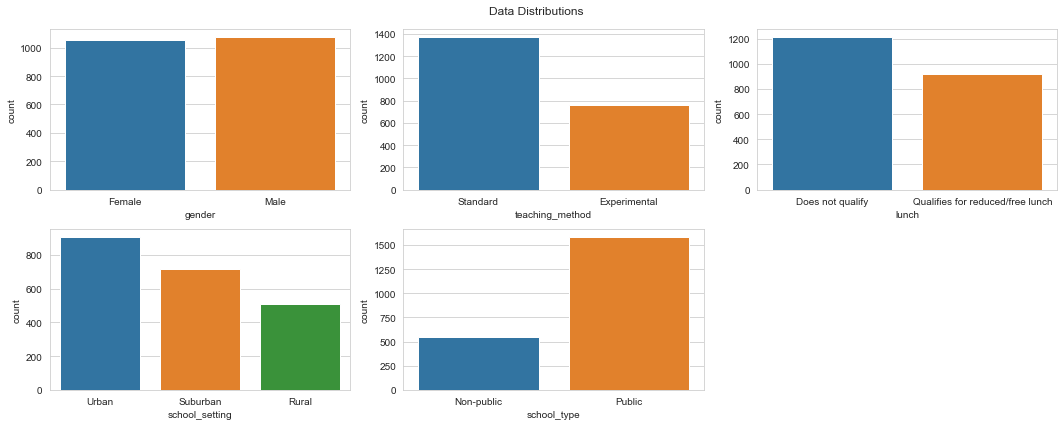

In [5]:
plt.figure(figsize=(15, 6))
plt.suptitle('Data Distributions')
for i, c in enumerate(['gender', 'teaching_method', 'lunch', 'school_setting', 'school_type']):
    plt.subplot(2, 3, i+1)
    sns.countplot(data[c])
plt.tight_layout()
plt.show()
    

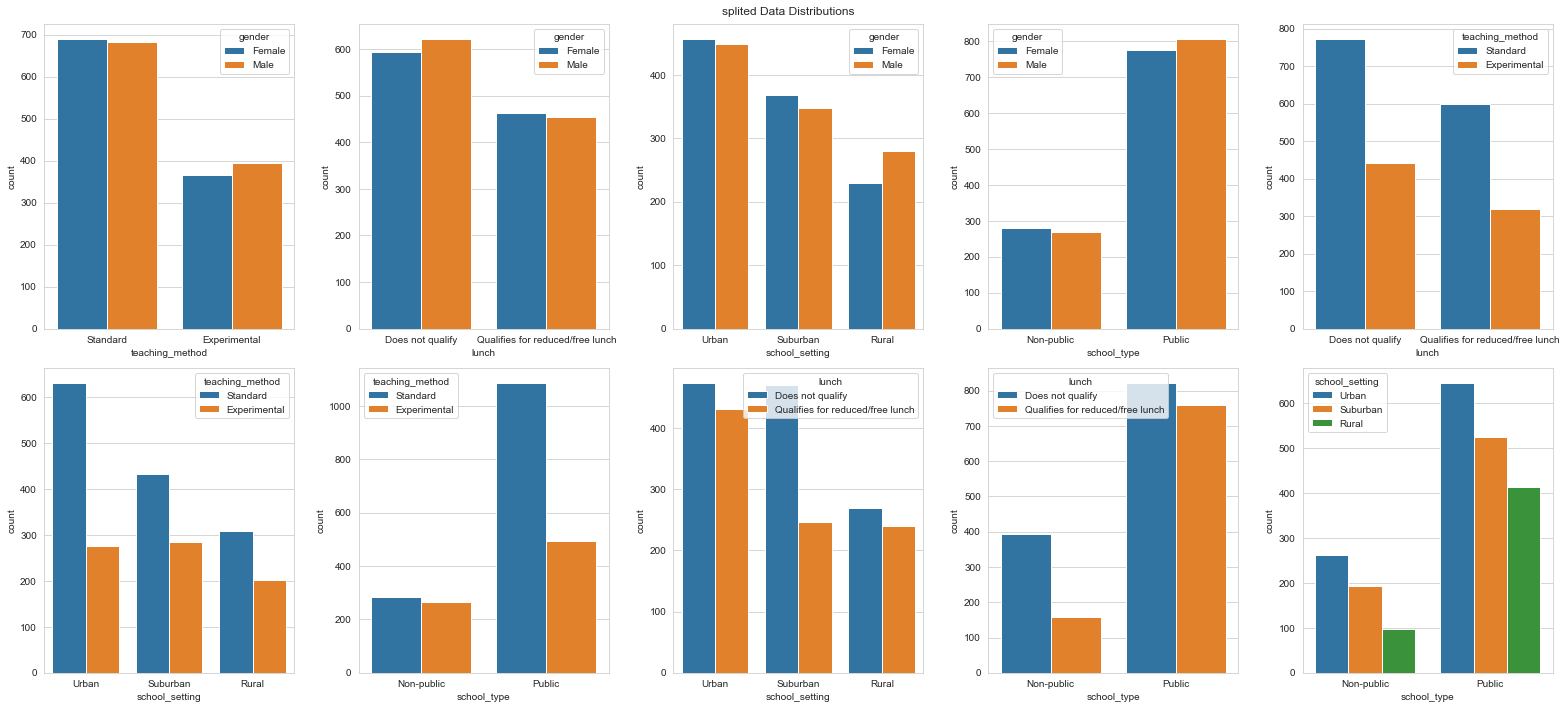

In [6]:
plt.figure(figsize=(22,10))
plt.suptitle('splited Data Distributions')
index=1
for i, c in enumerate(['gender', 'teaching_method', 'lunch', 'school_setting', 'school_type']):
    for j, col in enumerate(['gender', 'teaching_method', 'lunch', 'school_setting', 'school_type']):
        if j<=i:
            continue
        plt.subplot(2, 5, index)
        index += 1
        sns.countplot(data=data,x=col,hue=c)
plt.tight_layout()
plt.show()

In [7]:
data.corr()['posttest'].sort_values()

n_student   -0.504886
pretest      0.950884
posttest     1.000000
Name: posttest, dtype: float64

In [8]:
for_corr = data.drop(['school','student_id','gender','classroom'], axis=1)

for_replace = {'school_setting':{'Urban':0, 'Suburban':1, 'Rural':2},
               'school_type':{'Public':0, 'Non-public':1},
               'teaching_method':{'Standard':0, 'Experimental':1},
               'lunch':{'Does not qualify':0, 'Qualifies for reduced/free lunch':1}}

corr = for_corr.replace(for_replace)
corr.head(10)

,school_setting,school_type,teaching_method,n_student,lunch,pretest,posttest
0,0,1,0,20.0,0,62.0,72.0
1,0,1,0,20.0,0,66.0,79.0
2,0,1,0,20.0,0,64.0,76.0
3,0,1,0,20.0,0,61.0,77.0
4,0,1,0,20.0,0,64.0,76.0
5,0,1,0,20.0,0,66.0,74.0
6,0,1,0,20.0,0,63.0,75.0
7,0,1,0,20.0,0,63.0,72.0
8,0,1,0,20.0,0,64.0,77.0
9,0,1,0,20.0,0,61.0,72.0


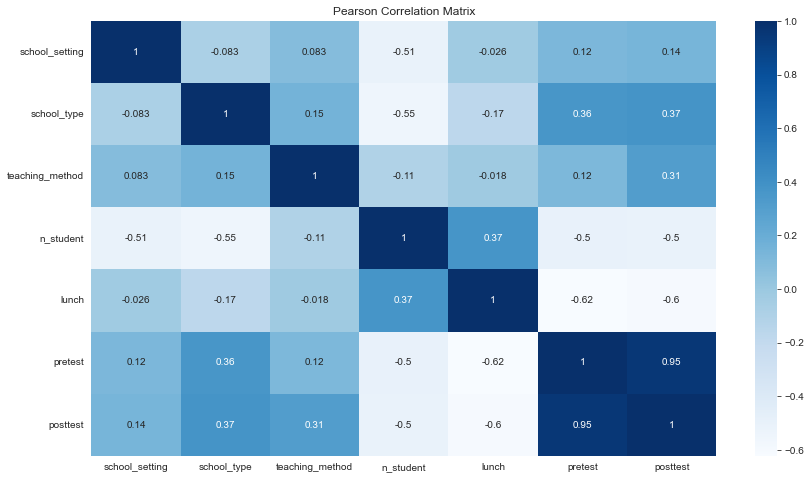

In [9]:
plt.figure(figsize=(14,8))
sns.heatmap(corr.corr(),annot=True,cmap='Blues')
plt.title('Pearson Correlation Matrix')
plt.show()

In [20]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X = corr.drop('posttest', axis=1)
y = corr['posttest'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
cat_model = CatBoostRegressor(loss_function='RMSE', verbose=50)

import pandas
X_test.to_csv("X_test.csv")

cat_model.fit(X_train, y_train,early_stopping_rounds=100,eval_set=[(X_test, y_test)])
pred = cat_model.predict(X_test)
print(mean_squared_error(pred, y_test))

Learning rate set to 0.055375
0:	learn: 13.2588992	test: 13.6256676	best: 13.6256676 (0)	total: 926us	remaining: 926ms
50:	learn: 3.3204817	test: 3.5853797	best: 3.5853797 (50)	total: 40.2ms	remaining: 748ms
100:	learn: 3.0161446	test: 3.2587383	best: 3.2587383 (100)	total: 78ms	remaining: 694ms
150:	learn: 2.9481007	test: 3.2101431	best: 3.2101431 (150)	total: 117ms	remaining: 656ms
200:	learn: 2.8857808	test: 3.1687355	best: 3.1687355 (200)	total: 156ms	remaining: 619ms
250:	learn: 2.8303974	test: 3.1446328	best: 3.1446328 (250)	total: 197ms	remaining: 589ms
300:	learn: 2.7809449	test: 3.1358552	best: 3.1332485 (286)	total: 238ms	remaining: 554ms
350:	learn: 2.7392706	test: 3.1258340	best: 3.1237032 (329)	total: 278ms	remaining: 514ms
400:	learn: 2.7011092	test: 3.1176942	best: 3.1176263 (399)	total: 322ms	remaining: 480ms
450:	learn: 2.6681381	test: 3.1176558	best: 3.1148699 (431)	total: 362ms	remaining: 441ms
500:	learn: 2.6395856	test: 3.1223702	best: 3.1148699 (431)	total: 402ms	

In [17]:
import lightgbm as lgbm

lgb_model = lgbm.LGBMRegressor()

lgb_model.fit(X_train, y_train,early_stopping_rounds=100, eval_set=[(X_test, y_test)], verbose=20)
pred = lgb_model.predict(X_test)
print(mean_squared_error(pred, y_test))

[20]	valid_0's l2: 13.5112
[40]	valid_0's l2: 9.76415
[60]	valid_0's l2: 9.643
[80]	valid_0's l2: 9.64256
[100]	valid_0's l2: 9.64389
9.626133775598685


In [12]:
from sklearn.model_selection import cross_val_score
rmse1=cross_val_score(cat_model,X,y,cv=3,scoring='neg_mean_squared_error')
print(rmse1)

Learning rate set to 0.043285
0:	learn: 15.2330557	total: 789us	remaining: 789ms
50:	learn: 3.7937290	total: 38.6ms	remaining: 719ms
100:	learn: 2.9743476	total: 76.8ms	remaining: 683ms
150:	learn: 2.8868108	total: 114ms	remaining: 640ms
200:	learn: 2.8310452	total: 150ms	remaining: 596ms
250:	learn: 2.8020669	total: 188ms	remaining: 561ms
300:	learn: 2.7572513	total: 225ms	remaining: 524ms
350:	learn: 2.7145128	total: 265ms	remaining: 490ms
400:	learn: 2.6794058	total: 303ms	remaining: 453ms
450:	learn: 2.6445353	total: 339ms	remaining: 413ms
500:	learn: 2.6155356	total: 378ms	remaining: 377ms
550:	learn: 2.5917624	total: 416ms	remaining: 339ms
600:	learn: 2.5715046	total: 453ms	remaining: 301ms
650:	learn: 2.5512343	total: 490ms	remaining: 263ms
700:	learn: 2.5333720	total: 528ms	remaining: 225ms
750:	learn: 2.5181131	total: 565ms	remaining: 187ms
800:	learn: 2.5036104	total: 605ms	remaining: 150ms
850:	learn: 2.4886508	total: 647ms	remaining: 113ms
900:	learn: 2.4752600	total: 687ms

In [13]:
rmse2=cross_val_score(lgb_model,X,y,cv=3,scoring='neg_mean_squared_error')
print(rmse2)

[-13.12939351 -22.8503319  -13.97493805]


In [14]:
# confusion_matrix_result1 = metrics.confusion_matrix(predict,y_test)
# print('The confusion matrix result:\n',confusion_matrix_result1)
# plt.figure(figsize=(8, 6))